<a href="https://colab.research.google.com/github/ghostrider303/RASA_NLU_CORE/blob/master/RASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install rasa_core==0.9.6 


    100% |████████████████████████████████| 133kB 6.9MB/s 
    100% |████████████████████████████████| 49.1MB 645kB/s 
    100% |████████████████████████████████| 655kB 11.9MB/s 
    100% |████████████████████████████████| 71kB 25.6MB/s 
    100% |████████████████████████████████| 51kB 20.3MB/s 
    100% |████████████████████████████████| 71kB 25.6MB/s 
    100% |████████████████████████████████| 61kB 21.7MB/s 
    100% |████████████████████████████████| 4.9MB 7.8MB/s 
    100% |████████████████████████████████| 962kB 18.4MB/s 
    100% |████████████████████████████████| 307kB 20.5MB/s 
    100% |████████████████████████████████| 133kB 32.9MB/s 
    100% |████████████████████████████████| 3.1MB 10.9MB/s 
    100% |████████████████████████████████| 204kB 31.5MB/s 
    100% |████████████████████████████████| 81kB 25.6MB/s 
    100% |████████████████████████████████| 81kB 10.5MB/s 
    100% |████████████████████████████████| 890kB 17.9MB/s 
    100% |████████████████████████████████| 3.1M

In [0]:
import logging,io,json,warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

In [0]:
 stories_md = """
## happy path               <!-- name of the story - just for debugging -->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_goodbye
  
  
## sad path 1               <!-- this is already the start of the next story -->
* greet
  - utter_greet             <!-- action the bot should execute -->
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* mood_affirm
  - utter_happy

## good purchase path               <!-- name of the story - for making purchase-->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* purchase                  <! -- user intention to purchase things --->
  - utter_purchase  
* purchase_affirm           <!-- user utterance, in format intent[entities] -->
  - utter_purchase
* purchase_affirm
  - utter_price
* mood_affirm
  - utter_goodbye
  
## good purchase path2
* greet              
  - utter_greet
* inform                    <!-- user utterance, in format intent[entities] -->
  - utter_ask_item
  - utter_show_item
  - utter_did_that_help
* goodbye
    - utter_goodbye

## no purchase path               <!-- name of the story - for making purchase-->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* purchase                  <! -- user intention to purchase things --->
  - utter_purchase  
* purchase_deny           <!-- user utterance, in format intent[entities] -->
  - utter_purchase
* purchase_deny
  - utter_ask_item
* mood_affirm
  - utter_goodbye
  
  
## get weather of location
* greet
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* inform
  - utter_ask_location
* inform{"location": "Paris"}
  - utter_ask_location
* goodbye
    - utter_goodbye
    - export
    
## get weather of location
* greet
    - utter_greet
* inform[location=London]
    - utter_ask_location
* goodbye
    - utter_goodbye
    - export
  
  
## strange user
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_unclear

## say goodbye
* goodbye
  - utter_goodbye

"""

%store stories_md > my_stories.md


Writing 'stories_md' (str) to file 'my_stories.md'.


In [0]:
domain_yml = """
intents:
  - greet
  - goodbye
  - mood_affirm
  - mood_deny
  - mood_great
  - mood_unhappy
  - purchase
  - purchase_affirm
  - purchase_deny
  - inform
  - weather
  
entities:
 - location
 - money
 
slots:
 location:
   type: text


actions:
- utter_greet
- utter_cheer_up
- utter_purchase
- utter_price
- utter_did_that_help
- utter_ask_item
- utter_show_item
- utter_happy
- utter_goodbye
- utter_unclear
- utter_ask_location

templates:
  utter_greet:
  - text: "Hey! How are you?"
  - text: "Hi How are you?"
  - text: "What's up"
  - text: "Bonjour"

  utter_cheer_up:
  - text: "Stay motivated,all is well"
  - text: "Here is something to make you happy"
  - text: "Here is something to cheer you up:"
    image: "https://i.imgur.com/nGF1K8f.jpg"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_unclear:
  - text: "I am not sure what you are aiming for."
  - text: "How do you mean? Can you clarify "
  - text: "Not quite sure what you want. "
  
  utter_happy:
  - text: "Great carry on!" 
  
  utter_purchase:
  - text: 'What item do you want to buy?'
  - text: 'Here are some recommended products'
  - text: 'You want to buy this?'
  - text: 'We only have this?'
  - text: 'Can you give me the specs ?'
  
  utter_ask_item:
  - text: 'What item do you want to buy?'
  - text: 'How many do you want to buy?'
  - text: 'Which type?'

  utter_show_item:
  - text: "Here are some suggestions."
  - text: "Check this one out."
  - text: "We only have this product"
  - text: "Sending sample picture"
    
  utter_price:
  - text: "It will cost you this much"
  - text: "The price is 100"
  - text: "You will pay"
  - text: "Here is the bill"
  - text: "The total cost is 2000, you can pay with your credit card."

  utter_ask_location:
  - text:'In what location?'
  - text:'In which place?'
  - text:'Where precisely?'

  utter_goodbye:
  - text: "Bye"
  - text: "Talk to you later"
  - text: "Cu"
  - text: "Aurevoir"
  - text: "A bientot "
  - text: "goodbye"
  - text: "have a nice day"
  - text: "see you around"
  - text: "bye bye"
  - text: "See you later"
  
"""

%store domain_yml > my_domain.yml


Writing 'domain_yml' (str) to file 'my_domain.yml'.


In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
!sudo apt-get install python-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
python-dev is already the newest version (2.7.15~rc1-1).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 6 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32

In [0]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

from rasa_core.agent import Agent
from rasa_core.policies.keras_policy import KerasPolicy
from rasa_core.policies.memoization import MemoizationPolicy

if __name__ == '__main__':
    agent = Agent("my_domain.yml",
                  policies=[MemoizationPolicy(), KerasPolicy()])

    agent.visualize("my_stories.md",
                    output_file="graph.png", max_history=2)

INFO:apscheduler.scheduler:Scheduler started
Using TensorFlow backend.
Processed Story Blocks: 100%|██████████| 9/9 [00:00<00:00, 212.65it/s, # trackers=1]


In [0]:
!ls

graph.png  my_domain.yml  my_stories.md  sample_data


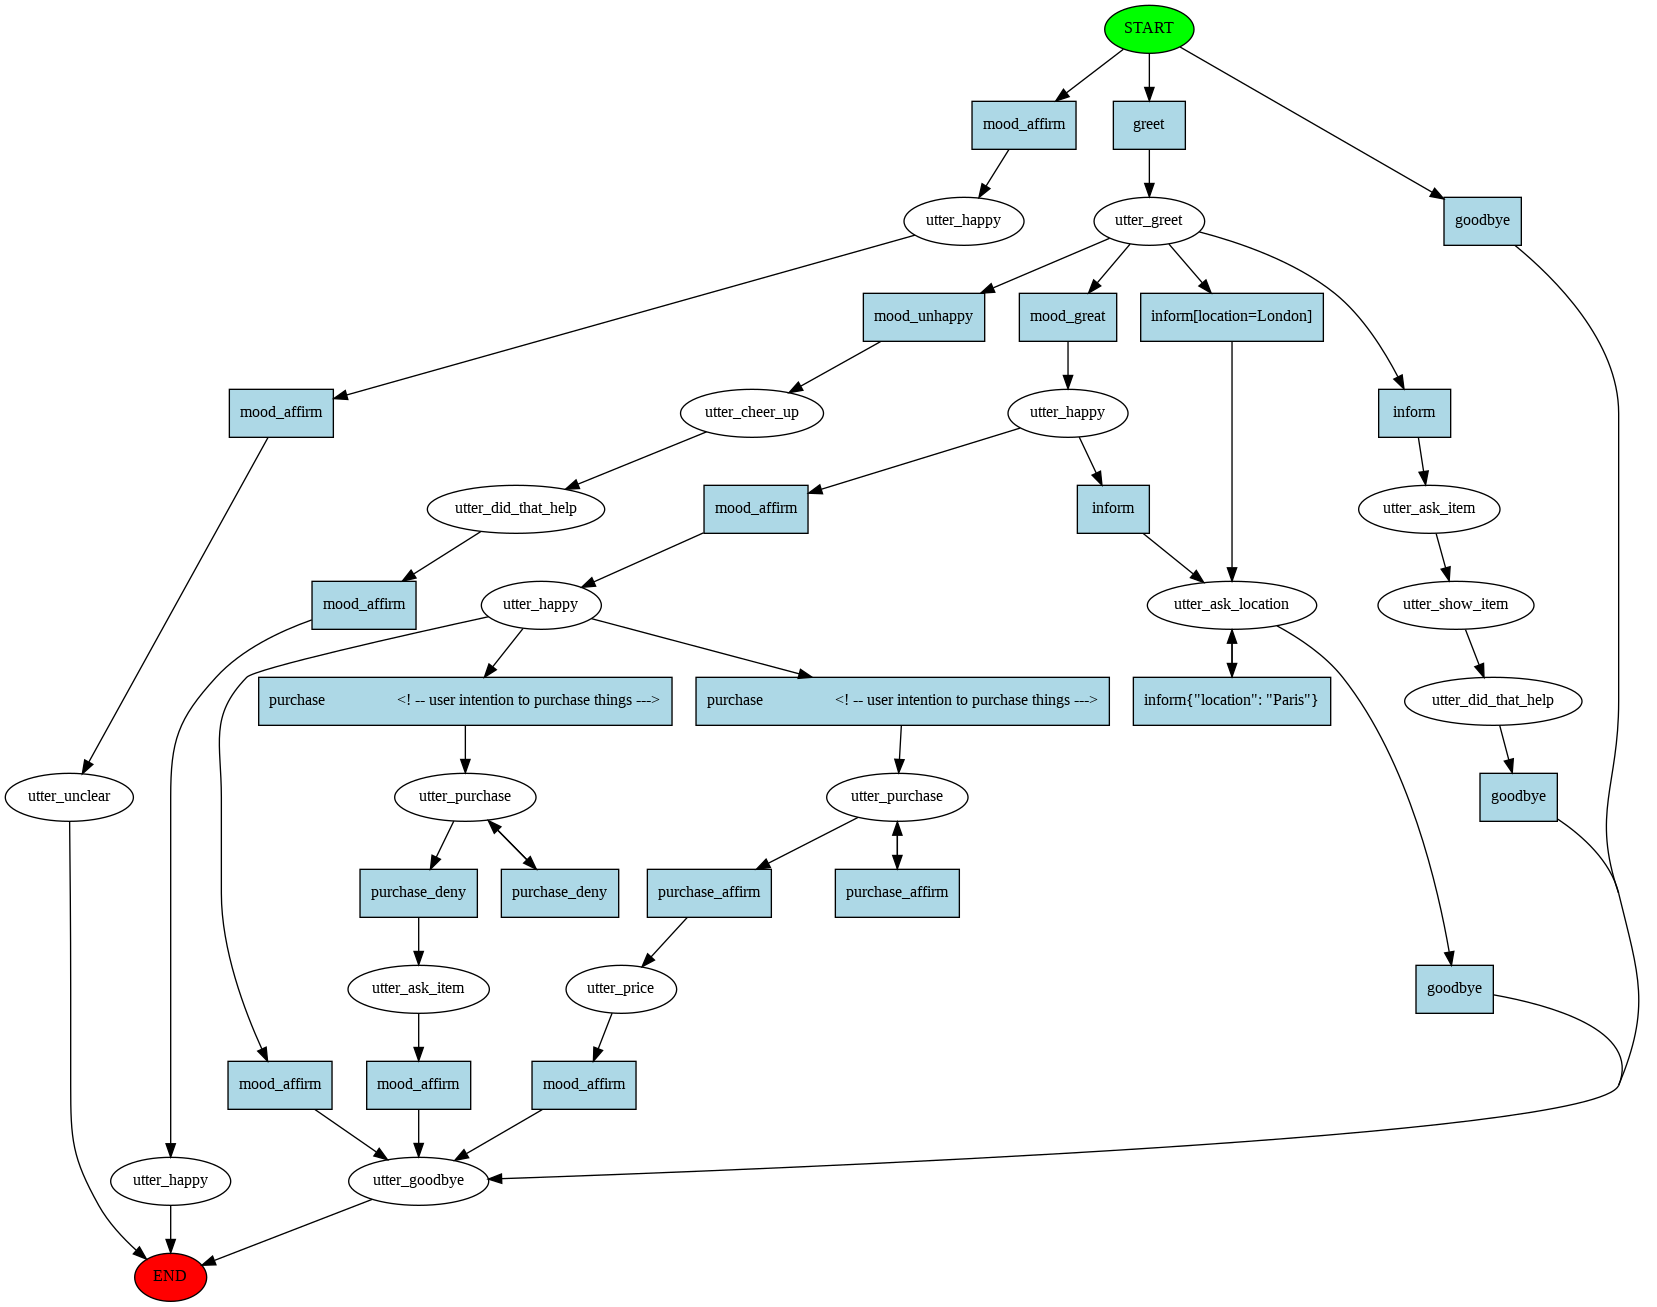

In [0]:
from IPython.display import Image
Image('graph.png')

In [0]:
from rasa_core.policies.keras_policy import KerasPolicy
from rasa_core.agent import Agent

In [0]:
agent=Agent("my_domain.yml",policies=[KerasPolicy()])

In [0]:
training_data=agent.load_data("my_stories.md")

Processed Story Blocks: 100%|██████████| 9/9 [00:00<00:00, 125.83it/s, # trackers=11]


In [0]:
agent.train(training_data,validatin_split=0.0,epochs=600)

INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 302/302 [00:21<00:00, 14.18it/s, # actions=243]
INFO:rasa_core.featurizers:Created 243 action examples.
INFO:rasa_core.policies.keras_policy:Fitting model with 243 total samples and a validation split of 0.0


Epoch 1/600
243/243 [==============================] - 0s 467us/step - loss: 0.1000 - acc: 0.9712
Epoch 2/600
243/243 [==============================] - 0s 437us/step - loss: 0.1165 - acc: 0.9671
Epoch 3/600
243/243 [==============================] - 0s 429us/step - loss: 0.0708 - acc: 1.0000
Epoch 4/600
243/243 [==============================] - 0s 443us/step - loss: 0.1286 - acc: 0.9588
Epoch 5/600
243/243 [==============================] - 0s 408us/step - loss: 0.0772 - acc: 0.9835
Epoch 6/600
243/243 [==============================] - 0s 419us/step - loss: 0.0989 - acc: 0.9835
Epoch 7/600
243/243 [==============================] - 0s 401us/step - loss: 0.1065 - acc: 0.9794
Epoch 8/600
243/243 [==============================] - 0s 366us/step - loss: 0.0917 - acc: 0.9753
Epoch 9/600
243/243 [==============================] - 0s 213us/step - loss: 0.0800 - acc: 0.9918
Epoch 10/600
243/243 [==============================] - 0s 202us/step - loss: 0.0675 - acc: 0.9918
Epoch 11/600
243/24

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model


In [0]:
agent.persist("models/dialogue")

INFO:rasa_core.agent:Persisted model to '/content/models/dialogue'


In [0]:
agent=Agent.load("models/dialogue")

In [0]:
print("Bot is ready")
while(1):
  a=input()
  if(a=="stop"):
    break
  responses=agent.handle_message(a)
  for r in responses:
    print(r["text"])

Bot is ready



Great carry on!



I am not sure what you are aiming for.
stop


Training Our Bot with Rasa NLU
Natural Language Understanding and Intent Classification

In [0]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

In [0]:
# Data Set
nludataset_md = """
## intent:greet
- hey
- hello
- hi
- hello there
- good morning
- good evening
- moin
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- cu
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later

## intent:mood_affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:mood_deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- feeling like a king
- wonderful
- I am feeling very good
- I am great
- I am amazing
- I am going to save the world
- super
- extremely good
- so so perfect
- so good
- so perfect

## intent:mood_unhappy
- my day was horrible
- I am sad
- I don't feel very well
- I am disappointed
- super sad
- I'm so sad
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not so good
- not very good
- extremly sad
- so saad
- so sad

## intent:purchase
- I need to buy IPhone
- I want to purchase some items
- What product is that?
- You need this watch.
- How much that it cost?
- He bought this house for $2000
- She is selling it
- I need to buy another
- Can you make a request for the product
- How much?
- This is so expensive
- It was very cheap
- He is buying 
- You ordered for this
- buy
- sell
- pay
- purchase
- what is the price
- Tell me the price
- Show me the product

## intent:purchase_affirm
- yes
- yes I need to buy it
- indeed I want to buy
- of course
- that sounds good
- correct
- I will take it

## intent:purchase_deny
- no I don't want it
- never
- I don't think so
- don't like that
- no way 
- not really
- no


## intent:inform
- I need to buy IPhone
- I want to purchase some items
- What product is that?

## intent:weather
- I wonder what is the weather in Vilnius right now?
- what is the weather?
- Tell me the weather
- Is the weather nice in Barcelona today
- I am going to London today and I wonder what is the weather out there?
- Show me the weather in Dublin, please
- Tell me the weather in Vilnius

"""

%store nludataset_md > nludataset.md


Writing 'nludataset_md' (str) to file 'nludataset.md'.


In [0]:
training_data = load_data('nludataset.md')

INFO:rasa_nlu.training_data.loading:Training data format of nludataset.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 113 (11 distinct intents)
	- Found intents: 'mood_unhappy', 'weather', 'purchase', 'purchase_affirm', 'mood_affirm', 'mood_deny', 'mood_great', 'purchase_deny', 'inform', 'goodbye', 'greet'
	- entity examples: 0 (0 distinct entities)
	- found entities: 



In [0]:
!apt-get -qq install -y graphviz libgraphviz-dev pkg-config && pip install pygraphviz;
!pip install rasa_nlu[spacy];
!python -m spacy download en;

    100% |████████████████████████████████| 757kB 18.1MB/s 

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [0]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer

In [0]:
training_data = load_data('nludataset.md')
pipeline = [{"name": "nlp_spacy"}, 
            {"name": "tokenizer_spacy"}, 
            {"name": "intent_featurizer_spacy"},  
            {"name": "intent_classifier_sklearn"}]

INFO:rasa_nlu.training_data.loading:Training data format of nludataset.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 113 (11 distinct intents)
	- Found intents: 'mood_unhappy', 'weather', 'purchase', 'purchase_affirm', 'mood_affirm', 'mood_deny', 'mood_great', 'purchase_deny', 'inform', 'goodbye', 'greet'
	- entity examples: 0 (0 distinct entities)
	- found entities: 



In [0]:
trainer=Trainer(RasaNLUModelConfig({"pipeline":pipeline}))
interpreter=trainer.train(training_data)
model_directory=trainer.persist("./projects/default/")

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_featurizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_classifier_sklearn


Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Successfully saved model into '/content/projects/default/default/model_20190412-090812'


In [0]:
agent=Agent.load("models/dialogue",interpreter=model_directory)

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


In [0]:
print("Smart Bot is ready")
while(1):
  a=input()
  if(a=="stop"):
    break
  responses=agent.handle_message(a)
  for r in responses:
    print(r["text"])

Smart Bot is ready
stop
